# An Introduction to analyzing Formamentis Networks using emoatlas


❗ **If this is the first time you're using EmoAtlas, it is suggest to consult the Starting_guide.ipynb before reading this notebook ([Github link](https://github.com/alfonsosemeraro/emoatlas/blob/main/demos/Starting_guide.ipynb)).** ❗



In this introduction, we will see what functions are offered by emoatlas for the analysis of Formamentis Networks.

It is important to note that this notebook will deal with analysis techniques from a high-level perspective and not a statistical one. Its scope will be limited to showing examples of some analysis techniques for analyzing these TFMN (Textual forma mentis networks). There are many techniques that have been developed for network analysis, so the reader is invited to consult existing literature for further techniques and methods.

If you are interested in a more sophisticated article of what is possible with EmoAtlas, please refer to [Social discourse and reopening after COVID-19: A post-lockdown analysis of flickering emotions and trending stances in Italy](https://firstmonday.org/ojs/index.php/fm/article/download/10881/9987).

---



# Setup

We start by importing the packages and by importing a demo file with sample texts.

In [2]:
# Importing packages
from emoatlas import EmoScores
import pandas as pd
import os
import json

In [3]:
# Importing the text file.

parent_directory = os.path.dirname(os.getcwd())
file_path = os.path.join(parent_directory,'sample_texts', 'bob_dylan.json')

# Opening Json file:
with open(file_path, 'r') as file:
    data = json.load(file)

## Importing the first 50 songs to analyze
text_lists = [song['text'] for song in data]
text_lists = text_lists[:50]
sample_text = '\n'.join(text_lists)

If you are interested in a csv file, you could the ```.read_csv``` method of pandas.

In [4]:
## Replace 'your_file_path.csv' with the actual path to your CSV file
#file_path = 'your_file_path.csv'
#
## Read the CSV file into a pandas DataFrame
#df = pd.read_csv(file_path)

After importing the data, we have to define an instance of the class ```EmoScores()```, this class has been documented in the starting_guide.

In [5]:
emos = EmoScores()

## Why are analysis techniques necessary?

Formamentis networks can be analysed visually, however, when a lot of text is present, more sophisticated analysis techniques become indispensable. This is easily seen if we plot the network.

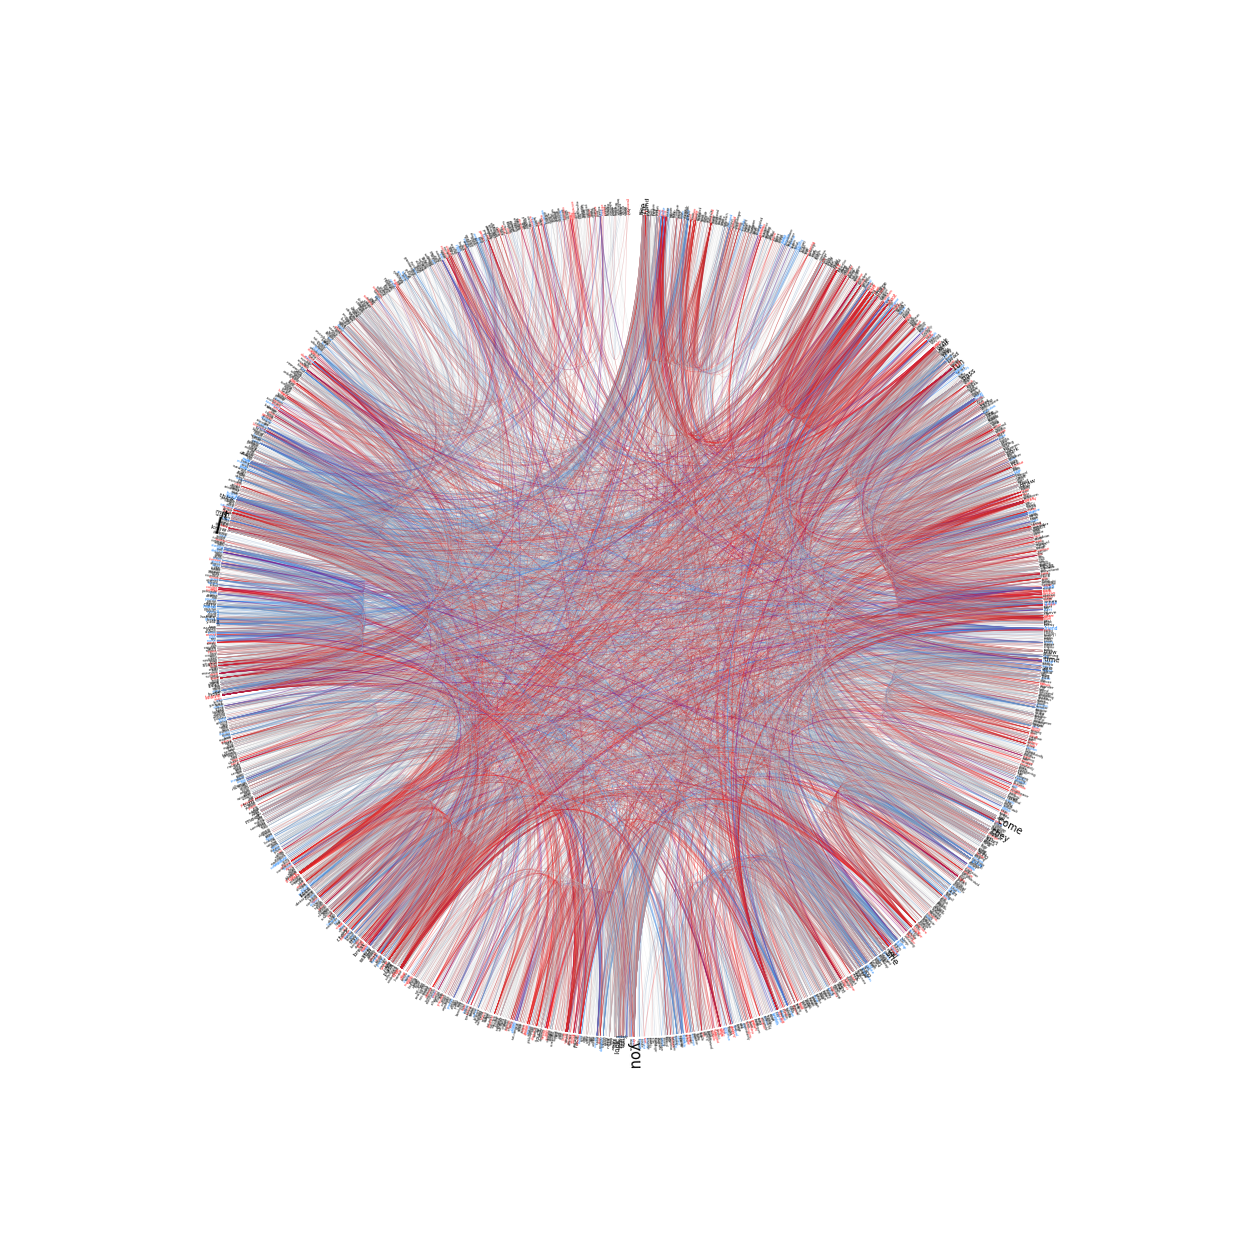

In [6]:
fmnt = emos.formamentis_network(sample_text) 
emos.draw_formamentis(fmnt,thickness=0.2,alpha_syntactic=0.4)

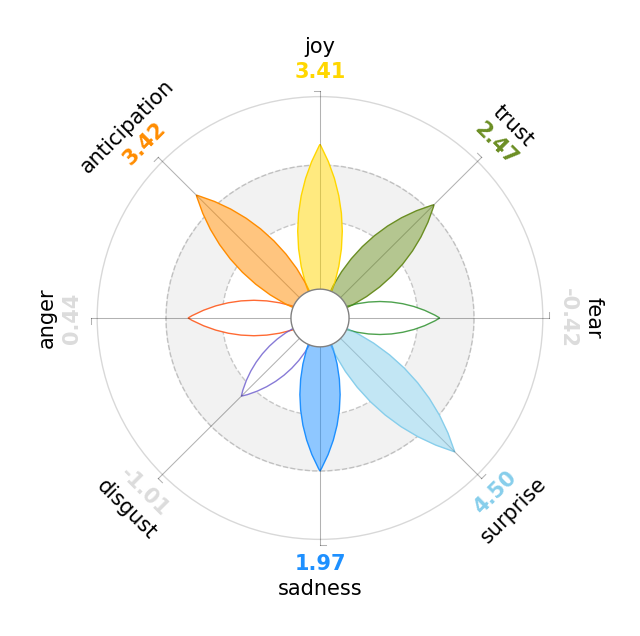

In [7]:
emos.draw_statistically_significant_emotions(sample_text)

---

# Utilities

### Getting edgelists
Depending on the type of analysis you want to perform with the networks, it may be useful to have access to the edgelist and vertices. Returning these elements is quite easy: once the fmnt is defined, it will only be necessary to use ```.edges``` or ```.vertices``` .

In [8]:
# We will see that fmnt is a Named Tuple of edges and vertices.
demo_text = """In this text, we prefer dogs becase they are happy. And even if some hounds can be aggressive, I do love our canine friends."""
fmnt_demo = emos.formamentis_network(demo_text, semantic_enrichment='synonyms', multiplex=True) 

print(fmnt_demo)

FormamentisNetwork(edges={'syntactic': [('prefer', 'they'), ('text', 'we'), ('dog', 'they'), ('happy', 'they'), ('happy', 'prefer'), ('happy', 'we'), ('friend', 'hound'), ('canine', 'friend'), ('dog', 'prefer'), ('prefer', 'text'), ('dog', 'text'), ('prefer', 'we'), ('dog', 'we'), ('they', 'we'), ('dog', 'happy'), ('I', 'love'), ('friend', 'love'), ('hound', 'love'), ('aggressive', 'love'), ('canine', 'love'), ('aggressive', 'hound'), ('I', 'hound'), ('I', 'aggressive'), ('I', 'friend'), ('aggressive', 'friend'), ('I', 'canine')], 'synonyms': [('dog', 'hound')]}, vertices=['friend', 'canine', 'hound', 'they', 'we', 'text', 'love', 'dog', 'aggressive', 'prefer', 'I', 'happy'])


In [9]:
fmnt = emos.formamentis_network(sample_text) 
# Returns a list of all the edges
print(fmnt.edges[0:5])
# Returns a list of all the vertices.
print(fmnt.vertices[0:5])

[('know', 'you'), ('I', 'know'), ('I', 'hate'), ('I', 'you'), ('hate', 'you')]
['unborn', 'clay', 'week', 'rag', 'instant']


If you are interested in representing also non-syntactic relationships, **multiplex must be set to True** and you need to specify the relationships with **semantic_enrichment**.

After doing so, fmnt will be a dictionary of edgelists, as such, you will need to index this dictionary as is done in the example below:

In [10]:
fmnt = emos.formamentis_network(sample_text, semantic_enrichment=['synonyms','hypernyms'],multiplex=True) 
fmnt.edges['synonyms'][0:5] #getting the synonyms edgelist.

[('aim', 'mother'),
 ('return', 'yield'),
 ('check', 'meet'),
 ('beat', 'catch'),
 ('meet', 'stand')]

### Getting a lemmatized text

It must be remarked that the formamentis networks of emoatlas are always generated from text, which can still be analysed quantitatively. Some analyses may thus require the text used by the library and not the network itself.

To facilitate these analyses, emoatlas has a function ```lemmatize_text()``` that returns a list of lemmatized words following the same procedure as emoatlas.

This function will also remove stopwords. Subjects ('I', 'you'), although sometimes considered stopwords, are retained here as they are useful for understanding semantic networks.

In [11]:

lemmatized_text = emos.lemmatize_text(sample_text)

print(lemmatized_text[:15])

['I', 'know', 'I', 'love', 'you', 'like', 'I', 'world', 'you', 'you', 'way', 'devil', 'sleep', 'lion', 'den']


In [ ]:
fmnt = emos.formamentis_network('the cat loves the dog',multiplex=True)
print(fmnt.edges['syntactic']) 

{'syntactic': [('cat', 'love'), ('cat', 'dog'), ('dog', 'love')], 'synonyms': []}


### Converting forma mentis networks to NetworkX Graphs and viceversa.


Depending on the type of analysis you want to perform, you might need a NetworkX graph.

The method ```.formamentis_to_nxgraph(graph)``` is used to convert a Formamentis Network object into a NetworkX graph. 

After converting a graph to a Formamentis Network, you can also revert this transformation using ```.nxgraph_to_formamentis(fmnt)```. __❗Warning❗: This method considers all edges in the graph as syntactic, meaning there are no distinctions based on semantic relationships__.



In [12]:
graph = emos.formamentis_to_nxgraph(fmnt)
print(list(graph.nodes))  # Output: List of nodes


NetworkXError: Edge tuple syntactic must be a 2-tuple or 3-tuple.

### Exporting forma mentis networks.

The methods ```.export_formamentis(fmnt, filename=None, path=None)``` and ```.import_formamentis(filepath=None)``` enable exporting and importing Formamentis Networks to and from text files. These functions allow you to save the edges of a Formamentis Network in a simple, readable format and recreate the network later. The arguments of ```export_formamentis``` are:
- *filename* (optional): Name of the output file. Defaults to "extracted_formamentis.txt". .txt is appended automatically.
- *path* (optional): Directory where the file will be saved. Defaults to the current working directory.

The output file will list all edges as pairs of vertices separated by commas. These function do not support multiplex networks.



---
---
---


# Metrics


## Frequency of words

**Frequency** is a metric that indicates how many times single words appear in a dataset. While it may appear to be a pretty simple metric, the information it provides can be very relevant.

Frequency can be easily computed. This example uses the popular library pandas do so.

In [ ]:
# Create a DataFrame from the list of lemmatized words
df_frequency = pd.DataFrame(lemmatized_text, columns=['Word'])

# Count the occurrences of each word and sort by count
word_counts = df_frequency['Word'].value_counts().reset_index()
word_counts.columns = ['Word', 'Count']

# Display the first 15 most common words
display(word_counts.head(15))

,Word,Count
0,I,741
1,you,339
2,it,180
3,she,116
4,he,112
5,they,71
6,come,63
7,like,58
8,we,51
9,time,49


## Node degree

The degree of a node measures the number of links a node has within a network. Nodes with higher degrees often play a crucial role in the information of the text. To compute the nodes with more degrees, we can use **networkx**, a popular package (and a dependency of emoatlas) that supports many operations for networks analysis.



In [ ]:
import networkx as nx

To use networx, it is reccomended to represent the fmnt as a networkx graph.

In these analyses, we are often interested not only in syntactic connections but also in semantic ones, such as synonyms. In order to consider both types of edge and merge them into a single edgelist, we can use ```semantic_enrichment``` to indicate our interest in synonyms and set ```Multiplex = False``` to specify to Emoatlas that we do not want the two edgelists (semantic and syntactic) to be separated.

In [ ]:
fmnt_metrics = emos.formamentis_network(sample_text, semantic_enrichment='synonyms', multiplex=False)

# Creating a graph
G = nx.Graph()
G.add_edges_from(fmnt_metrics.edges)

After doing so, we can compute the degrees with the method ```.degree()``` and then represent the nodes with the highest degree using pandas.

In [ ]:
# Compute the degree of each node in the graph
degree = dict(G.degree())

# Convert the dictionary to a DataFrame
degree_df = pd.DataFrame(list(degree.items()), columns=['Node', 'Degree'])

# Sort the DataFrame by degree in descending order
degree_df = degree_df.sort_values(by='Degree', ascending=False)

display(degree_df.head(15))


,Node,Degree
2,I,684
1,you,397
31,it,294
50,come,230
195,she,204
98,he,203
115,they,193
198,run,163
176,look,144
131,time,139


## Closeness centrality

Closeness centrality is a measure in network analysis that quantifies how close a node is to all other nodes in a network. It is calculated as the reciprocal of the sum of the length of the shortest paths between the node and all other nodes in the graph. Thus, the more central a node is, the closer it is to all other nodes.

It can be computed by the method ```.closeness_centrality()``` of networkx, in a similar fashion to the nodes degree.


In [ ]:
# Compute closeness centrality for each node in the graph
closeness_centrality = nx.closeness_centrality(G)

# Convert the dictionary to a DataFrame
closeness_df = pd.DataFrame(list(closeness_centrality.items()), columns=['Node', 'Closeness Centrality'])

# Sort the DataFrame by closeness centrality in descending order
closeness_df = closeness_df.sort_values(by='Closeness Centrality', ascending=False)

display(closeness_df.head(15))

,Node,Closeness Centrality
2,I,0.619174
1,you,0.547954
31,it,0.523886
50,come,0.512386
115,they,0.502460
98,he,0.499541
195,she,0.498475
198,run,0.490838
184,tell,0.484148
176,look,0.483003


------
------
------
------

# Analyzing the emotional content and formamentis networks of individual words

After computing the metrics of our network, it is possible to gain an understanding of which words are more central and crucial within it.

Therefore, Emoatlas facilitates the analysis of individual words, allowing for a more in-depth exploration of the cognitive patterns embedded in the text.

To do so, we use the method ```extract_word_from_formamentis``` which requires two arguments: 
- *fmn*: the formamentis from which the word must be extracted.
- *target_word*: Only the edges that are related to this word will be extracted.

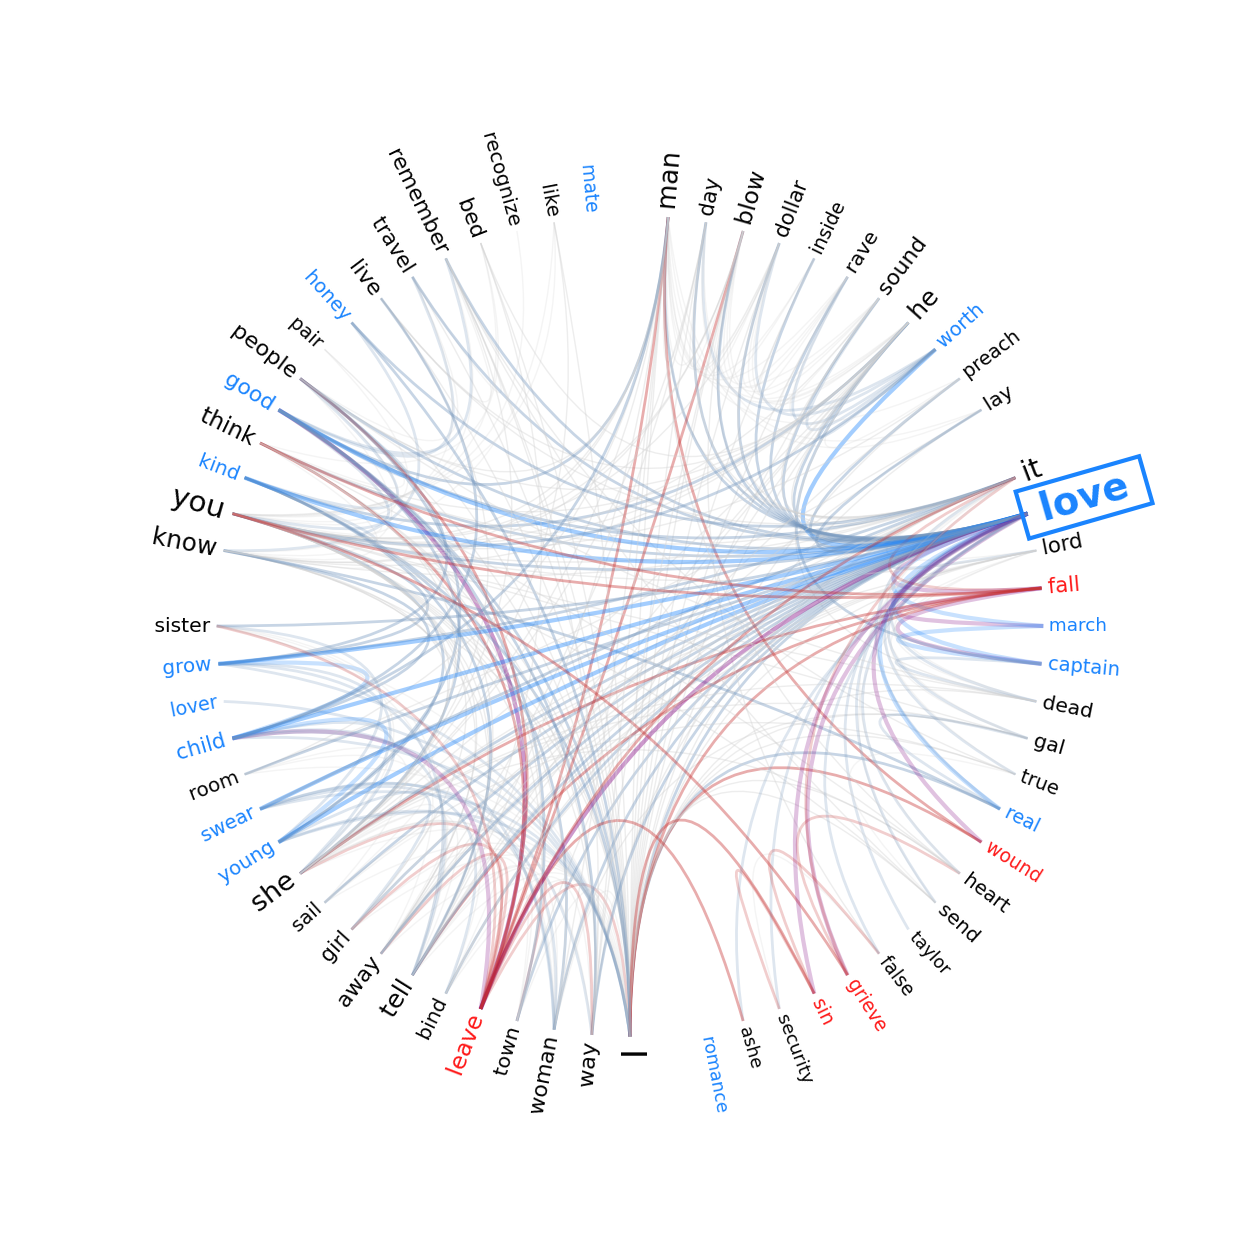

In [ ]:
# Displaying a single word
fmnt_you = emos.extract_word_from_formamentis(fmnt, 'love')
emos.draw_formamentis(fmnt_you, highlight='love', alpha_syntactic=0.4, alpha_hypernyms=0, alpha_synonyms=0)

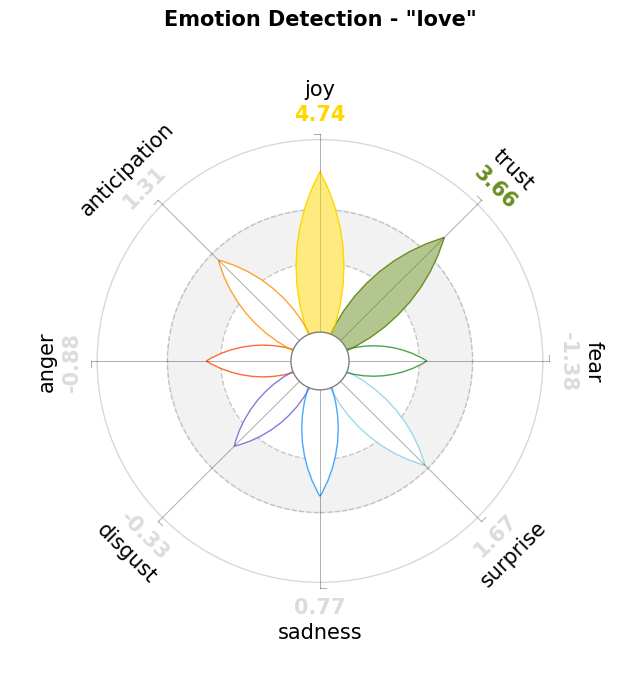

In [ ]:
emos.draw_statistically_significant_emotions(fmnt_you, title = 'Emotion Detection - \"love\"')